# Аналитика покупательского поведения в e-commerce: когортный анализ и сегментация #

#### Описание проекта: ####
Цель проекта — комплексный анализ данных электронной коммерции для улучшения понимания покупательского поведения и повышения качества обслуживания пользователей. Анализ включает исследование данных о покупках, заказах и товарных позициях, чтобы получить полезные инсайты, которые помогут принять обоснованные решения для бизнеса.

#### Основные задачи проекта: ####

Анализ уникальных пользователей

Анализ недоставленных заказов

Популярность товаров по дням недели

Среднее количество покупок на пользователя

Когортный анализ пользователей:

Провести когортный анализ для понимания поведения и удержания пользователей по месяцам.
Определить когорту с самым высоким уровнем удержания на третий месяц в период с января по декабрь.

RFM-сегментация пользователей:

Провести RFM-анализ (Recency, Frequency, Monetary) для сегментации пользователей и определения их ценности.
Разделить пользователей на кластеры по метрикам:
R (Recency): время с момента последней покупки.
F (Frequency): общее количество покупок.
M (Monetary): общая сумма покупок.

In [79]:
# Импортируем нужные нам библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import timedelta

In [80]:
# Пропишем путь к нужным файлам
way = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-vl-klimovskih/First_project'

In [81]:
# Создаем пустой список для создания списка путей
# проходимся циклом по всем файлам в папке
# Проходимся по каждому файлу в папке отдельно
# Записываем директорию с файлом в один путь
# Объединяем в один список со всеми путями
# Проверяем, что все верно работает

orders_path = []
for path, dirs, files in os.walk(way):
    for file in files:
        order_path = os.path.join(path, file)
        orders_path.append(order_path)
orders_path

['/mnt/HC_Volume_18315164/home-jupyter/jupyter-vl-klimovskih/First_project/olist_customers_dataset.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-vl-klimovskih/First_project/olist_order_items_dataset.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-vl-klimovskih/First_project/olist_orders_dataset.csv']

In [82]:
#  таблица с уникальными идентификаторами пользователей
olist_customers_dataset = pd.read_csv(orders_path[0])

# таблица заказов
olist_orders_dataset = pd.read_csv(orders_path[2])

# товарные позиции, входящие в заказы
olist_order_items_dataset = pd.read_csv(orders_path[1]) 

In [83]:
# Загрузим все ДатаФреймы

In [84]:
olist_customers_dataset.head(2) 

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [85]:
# Проверяем на наличие пустых значений в ячейках
olist_customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [86]:
olist_orders_dataset.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [87]:
olist_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [88]:
# Заменим тип данных с датами object на datetime
ood = olist_orders_dataset

ood['order_purchase_timestamp'] = pd.to_datetime(olist_orders_dataset['order_purchase_timestamp'])
ood['order_approved_at'] = pd.to_datetime(olist_orders_dataset['order_approved_at'])
ood['order_delivered_carrier_date'] = pd.to_datetime(olist_orders_dataset['order_delivered_carrier_date'])
ood['order_delivered_customer_date'] = pd.to_datetime(olist_orders_dataset['order_delivered_customer_date'])
ood['order_estimated_delivery_date'] = pd.to_datetime(olist_orders_dataset['order_estimated_delivery_date'])

olist_orders_dataset = ood
olist_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [89]:
olist_order_items_dataset.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [90]:
olist_order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Наличие пустых значений в ДатаФрейме **olist_orders_dataset** возможно обусловлено тем, что:
- не все заказы еще переданы в логичтическую службу;
- не все заказы еще подтверждены

Поэтому исключаем возможность удаления строк с пустыми значениями, чтобы не допустить ошибок в будущем

**Сколько у нас пользователей, которые совершили покупку только один раз?**

In [91]:
'''Объединяем ДатаФреймы  olist_customers_dataset и olist_orders_dataset, 
для того, чтобы понять сколько заказов делал каждый пользователь'''

purchase_only_once = olist_customers_dataset.merge(olist_orders_dataset, how='left', on='customer_id')

In [92]:
# Проверяем, что объединенный ДатаФрейм работает

purchase_only_once.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [93]:
purchase_only_once.info()
# Так же проверяем что все значения подтянулись

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 10  order_delivered_customer_date  96476 non-null  datetime64[ns]
 11  order_estimated

In [94]:
# Посмотрим информацию по статусам заказов из нашего датайрейма

purchase_only_once.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Будем считать, что пользователь совершил покупку, если статус заказа  равняется processing, shipped, delivered, approved, invoiced.

In [95]:
'''Так же отметим, что некоторые заказы, которые доставлены, не имеют времени подтверждения оплаты.
Возможно это какой то сбой при заполнении данных, поэтому при подсчете пользователей совершивших покупки, 
мы не будем учитывать время подтверждения оплаты заказа которое равно NaN.'''

purchase_only_once.query('order_approved_at.isnull() and order_status == "delivered"') 
# смотрим, какие заказы имею статус "Доставлен", при этом не имеют времени оплаты заказа

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
8970,0bf35cac6cc7327065da879e2d90fae8,c4c0011e639bdbcf26059ddc38bd3c18,13225,varzea paulista,SP,d77031d6a3c8a52f019764e68f211c69,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
13890,1e101e0daffaddce8159d25a8e53f2b2,c8822fce1d0bfa7ddf0da24fff947172,27945,macae,RJ,12a95a3c06dbaec84bcfb0e2da5d228a,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
20863,d5de688c321096d15508faae67a27051,d49f3dae6bad25d05160fc17aca5942d,36400,conselheiro lafaiete,MG,7002a78c79c519ac54022d4f8a65e6e8,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
22703,07a2a7e0f63fd8cb757ed77d4245623c,79af1bbf230a2630487975aa5d7d6220,37660,paraisopolis,MG,51eb2eebd5d76a24625b31c33dd41449,delivered,2017-02-18 15:52:27,NaT,2017-02-23 03:09:14,2017-03-07 13:57:47,2017-03-29
27441,68d081753ad4fe22fc4d410a9eb1ca01,2e0a2166aa23da2472c6a60c4af6f7a6,3573,sao paulo,SP,d69e5d356402adc8cf17e08b5033acfb,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39286,d85919cb3c0529589c6fa617f5f43281,c094ac95fcd52f821809ec232a7a6956,95795,sao vendelino,RS,3c0b8706b065f9919d0505d3b3343881,delivered,2017-02-17 15:53:27,NaT,2017-02-22 11:31:30,2017-03-03 11:47:47,2017-03-23
41493,74bebaf46603f9340e3b50c6b086f992,f79be7c08dd24b72d34634f1b89333a4,65110,sao jose de ribamar,MA,2babbb4b15e6d2dfe95e2de765c97bce,delivered,2017-02-18 17:15:03,NaT,2017-02-22 11:23:11,2017-03-03 18:43:43,2017-03-31
44050,684cb238dc5b5d6366244e0e0776b450,6ff8b0d7b35d5c945633b8d60165691b,11030,santos,SP,c1d4211b3dae76144deccd6c74144a88,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
52849,a3d3c38e58b9d2dfb9207cab690b6310,5a4fa4919cbf2b049e72be460a380e5b,35620,abaete,MG,2eecb0d85f281280f79fa00f9cec1a95,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20
60039,2127dc6603ac33544953ef05ec155771,8a9a08c7ca8900a200d83cf838a07e0b,6708,cotia,SP,e04abd8149ef81b95221e88f6ed9ab6a,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17


In [96]:
purchase_only_once.query('order_status in ("processing", "shipped", "delivered", "approved")')\
                  .customer_unique_id.value_counts()\
                  .reset_index()\
                  .rename(columns={'index': 'customer_unique_id', 'customer_unique_id': 'count'})\
                  .query('count == 1')\
                  .customer_unique_id.count()
# 1. Отбираем нужные нам статусы 
# 2. Подсчитываем количество уникальных пользователей
# 3. Переименовываем столбцы
# 4. Отбираем только те строки, количество повторений которых = 1
# 5. Считаем количество строк, которые не повторяются. Это и будут пользователи, соревшившие одну покупку

91816

**Ответ:** Пользователей совершивших только 1 покупку - 91816 чел.

**Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (10 баллов)**

Для начала будем считать недоставленными заказами те, у которых статус заказа не является **"delivered"**, так как у нас есть заказы, информация о которых не записалась

А так же уберем заказы, которые отгружены со склада, тк скорее всего они уже будут доставлены покупателю

Так же исключим созданные заказы и подтвержденные, тк скорее всего они только появились и система не успела обработать заказ

In [97]:
orders_not_delivered = olist_orders_dataset.query('order_status != ["delivered","shipped","approved","created"]')

Далее пойдем по логике:
- Если товар имеет статус delivered, то значит он доставлен и нам не интересен (отчекаем на предыдущем шаге)
- Получаем ДатаФрейм с заказами которые еще не доставлены.
- Группируем полученный ДатаФрейм по месяцу и статусу заказа. Считаем количество заказов
- Строим барплот и видим график причин по месяцам
- Далее группируем по статусу заказа и считаем среднее. Получаем количество заказов которые в среднем не доставлятся в месяц

In [98]:
# Добавляем месяц в наш ДатаФрейм

orders_not_delivered['month'] = orders_not_delivered.order_purchase_timestamp.dt.month

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
# Производим группировку и агрегацию

orders_not_delivered_month = orders_not_delivered.groupby(['month', 'order_status'], as_index=False)\
                                                 .agg({'order_id': 'count'})\
                                                 .rename(columns=({'order_id': 'count_orders'}))

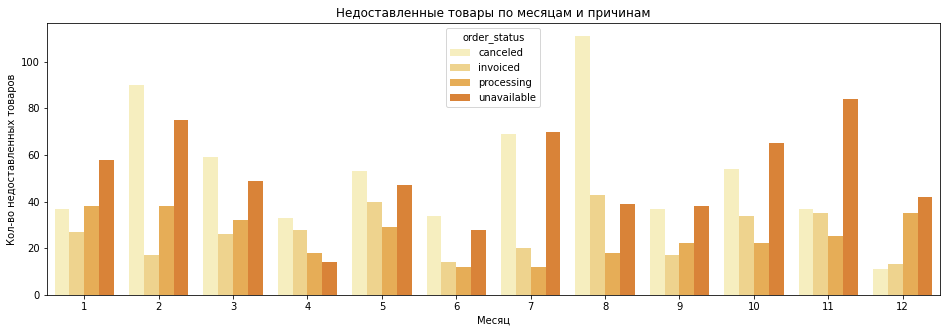

In [100]:
# Строим график

plt.figure(figsize=(16, 5))
sns.barplot(x='month', y='count_orders', hue='order_status', data=orders_not_delivered_month)
plt.title('Недоставленные товары по месяцам и причинам')
plt.ylabel('Кол-во недоставленных товаров')
plt.xlabel('Месяц')
plt.show()  

In [101]:
# Группируем по статусу заказа и выводим средние значения

orders_not_delivered_month.groupby('order_status', as_index=False).agg({'count_orders': 'mean'}).round(2)

,order_status,count_orders
0,canceled,52.08
1,invoiced,26.17
2,processing,25.08
3,unavailable,50.75


In [102]:
# Считаем среднее количество недоставленных заказов

orders_not_delivered_month.groupby('order_status', as_index=False)\
                          .agg({'count_orders': 'mean'})['count_orders'].sum().round()
# Округляем до 0, тк заказ не может быть к примеру 0.5

154.0

Ответ: в среднем в месяц недоставленных заказов равно 154

В основном это отмененные заказы (52) и товары которые стали недоступны (50)

А так же неоплаченные заказы(26) и заказы, которые еще не собраны (25)

**По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)**

In [103]:
# Что считается купленным товаром: купленным товаром пусть считается тот товар, который подтвержден, в процессе сборки,
# отгружен со склада, доставлен пользователю. В других случаях мы не уверены что товар будет куплен.
# День покупки товара будем читать время подтверждения оплаты заказа

In [104]:
# Отбираем только интересующие нас колонки

product = olist_order_items_dataset[['order_id', 'product_id']]

In [105]:
# Отбираем только интересующие нас колонки

orders = olist_orders_dataset[['order_id', 'order_approved_at', 'order_status']]

In [106]:
# Обьединяем датафреймы чтобы понять когда какой товар покупался

produsts = product.merge(orders, how='left')

In [107]:
# Убираем товары, которые еще не оплачены, отменены, только созданы и недоступны.

produsts = produsts.query('order_status != ["created","invoiced", "unavailable", "canceled"]')

In [108]:
produsts['day'] = produsts['order_approved_at'].dt.weekday
# 0 - понедельник
# 6 - Воскресение

# Группируем данные по продукту и дню, для того что бы посчитать сколько раз заказывали данные товары по дням 

df = produsts.groupby(['product_id', 'day'], as_index=False)\
             .agg({'order_status': 'count'})\
             .rename(columns={'order_status': 'count_orders'})

# Проверяем основные показатели

df.describe()

,day,count_orders
count,60576.000000,60576.00000
mean,2.790462,1.84441
std,1.903479,2.97825
min,0.000000,1.00000
25%,1.000000,1.00000
50%,3.000000,1.00000
75%,4.000000,2.00000
max,6.000000,119.00000


In [109]:
# Более 75% занимают значения до 1-2 повторения. Скорее всего это не самые популярные товары поэтому отсечем их

df = df.sort_values(by=['count_orders'], ascending=False)\
       .query('count_orders > 2')

In [110]:
df = df.drop_duplicates('product_id')

'''В отфильтрованной таблицу на прошлом шаге удаляем дубликаты. Тк у нас значения уже отфильтрованы то удаление 
дубликатов даст нам таблцу только с товарами которые встречаются чаще всего и день недели.'''

df

,product_id,day,count_orders
40695,aca2eb7d00ea1a7b8ebd4e68314663af,1.0,119
19959,53b36df67ebb7c41585e8d54d6772e08,1.0,105
15787,422879e10f46682990de24d770e7f83d,1.0,89
36218,99a4788cb24856965c36a24e339b6058,1.0,82
12951,368c6c730842d78016ad823897a372db,3.0,80
...,...,...,...
10091,29e4631be78811ab993ae12613053b53,1.0,3
6207,1978f38f6cbdcaf326ecbb4732f9f748,4.0,3
10171,2a3539131370b3ac020dd5f7a656a53d,1.0,3
26364,6ee79a827c36202118501870afb17875,2.0,3


In [111]:
# Выведем также детализацию по дням (количесво заказов по дням)

df.groupby('day').agg({'count_orders': 'sum'})\
    .style\
    .bar(subset='count_orders', color='#FFCC42')

,count_orders
day,
0.0,1874
1.0,7040
2.0,3471
3.0,3569
4.0,2821
5.0,1805
6.0,819


**Ответ:** Чаще всего товар покупается во вторник. Детализацию по товару можно посмотреть по таблице выше, добавив фильтр, то можно найти статистику по нужному нам товару

**Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов)**

In [112]:
# Покупкой будем считать заказ который так же как и в 3 шаге, подтвержден, в процессе сборки, отгружен со склада
# и доставлен пользователю
# Дату покупки так же считать по order_approved_at

In [113]:
# Отсекаем ненужные там строки

de = olist_orders_dataset.query('order_status != ["created","invoiced", "unavailable", "canceled"]')

In [114]:
# Соединяем таблицу с уникальными пользователями, чтобы на 100% быть уверенными что пользователи не повторяются

de = de.merge(olist_customers_dataset, how='left', left_on='customer_id', right_on='customer_id')

In [115]:
# Создаем ДатаФрейм с интересующими нас столбцами

de = de[['customer_unique_id', 'order_id', 'order_approved_at']]

In [116]:
# Приводим даты к началу месяца

de['month'] = de['order_approved_at'] - pd.offsets.MonthBegin(1, normalize=True)

In [117]:
de

,customer_unique_id,order_id,order_approved_at,month
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,2017-10-01
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,2018-07-01
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23,2018-08-01
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:45:59,2017-11-01
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 22:20:29,2018-02-01
...,...,...,...,...
97883,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,2017-03-01
97884,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 13:10:37,2018-02-01
97885,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,2017-08-27 15:04:16,2017-08-01
97886,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-08 21:36:21,2018-01-01


In [118]:
de_1 = de.groupby(['customer_unique_id', 'month'], as_index=False)\
         .agg({'order_id': 'count'})\
         .sort_values(by='order_id', ascending=False)
# Группируем данные по пользователям и по месяцу, считаем количество заказов

In [119]:
de_1

,customer_unique_id,month,order_id
7213,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-01,6
14261,25a560b9a6006157838aab1bdbd68624,2017-04-01,4
66717,b08fab27d47a1eb6deda07bfd965ad43,2017-09-01,4
68331,b4e4f24de1e8725b74e4a1f4975116ed,2018-02-01,4
61242,a239b8e2fbce33780f1f1912e2ee5275,2017-02-01,4
...,...,...,...
32362,559df1e714566692202143c82bf531ca,2018-04-01,1
32361,559c99ed25c0bfe03e2e037c3205e9b6,2017-09-01,1
32360,559c5ec4792aa8e44f53927870b23cf9,2018-03-01,1
32359,559b4e068cbe3b0fe760abd5baad57a9,2018-02-01,1


In [120]:
# Проверка, что данные верно посчитались
# Видим, что действительно, польззователь за месяц сорешил 6 заказов

de.query('customer_unique_id == "12f5d6e1cbf93dafd9dcc19095df0b3d"')

,customer_unique_id,order_id,order_approved_at,month
925,12f5d6e1cbf93dafd9dcc19095df0b3d,747996a66f5aa711deb8ae58f5ae46a0,2017-01-07 03:44:28,2017-01-01
4656,12f5d6e1cbf93dafd9dcc19095df0b3d,9b91ddcbd6cbceb83d4fd2462ca1f95e,2017-01-07 03:44:09,2017-01-01
27586,12f5d6e1cbf93dafd9dcc19095df0b3d,464de32dc84484c1d26df3e8e38e708b,2017-01-07 03:35:36,2017-01-01
35283,12f5d6e1cbf93dafd9dcc19095df0b3d,17fed53ba6dfef9b594ee2268642e2aa,2017-01-07 03:35:35,2017-01-01
80215,12f5d6e1cbf93dafd9dcc19095df0b3d,ca5a215980675471f0cf8199c041909a,2017-01-07 03:44:16,2017-01-01
81150,12f5d6e1cbf93dafd9dcc19095df0b3d,8a784d47854e4cbc5562362393d504db,2017-01-07 03:44:16,2017-01-01


In [121]:
# Подсчитываем количество недель, округляем их до 2х знаков

de_1['count_week'] = round(((de['month'].apply(lambda t: pd.Period(t, freq='S').days_in_month)) / 7), 2)

In [122]:
# Делим количество заказов на количество недель, 
# и получаем среднее количество заказов у пользователей в среднем за неделю

de_1['mean_count_orders_of_week'] = (de_1['order_id'] / de_1['count_week']).round(2)

In [123]:
de1 = de_1[['customer_unique_id', 'mean_count_orders_of_week']]
de1.mean_count_orders_of_week.mean().round(2)

0.23

**Ответ:** в среднем каждый пользователь совершает 0.23 покупки в неделю, т.е. примерно 1 покупку в месяц

**5.1. Выполните когортный анализ пользователей.**

**5.2. В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц. Описание подхода можно найти тут. Для визуализации когортной таблицы рекомендуем использовать пример из 8-го урока python, раздел “Стильный урок”, степ 5. (15 баллов)**

In [124]:
# Поделим пользователей на когорты по времени подтверждения оплаты заказа [order_approved_at] (год-месяц)

In [125]:
ood = olist_orders_dataset
ood = ood.merge(olist_customers_dataset, how='left', left_on='customer_id', right_on='customer_id')

In [126]:
# Определим месяц первой покупки

ood['cohort_month'] = (ood.groupby('customer_unique_id')
                       ['order_approved_at'].transform('min').dt.to_period('M'))

# Определлим месяц каждой покупки

ood['purchase_month'] = ood['order_approved_at'].dt.to_period('M')

In [127]:
# Создадим сводную таблицу, где сгруппируем месяц первой покупки, 
# месяц каждоый покупки, и количество уникальных пользователей

cohort_data = ood.groupby(['cohort_month', 'purchase_month'])\
                 .agg({'customer_unique_id': 'nunique'})\
                 .reset_index()\
                 .rename(columns=({'customer_unique_id': 'users'}))

In [128]:
# Добавление столбца с количеством месяцев с момента первой покупки

cohort_data['cohort_index'] = ((cohort_data['purchase_month'].dt.year - cohort_data['cohort_month'].dt.year) * 12 + (cohort_data['purchase_month'].dt.month - cohort_data['cohort_month'].dt.month))
cohort_data

,cohort_month,purchase_month,users,cohort_index
0,2016-09,2016-09,1,0
1,2016-10,2016-10,317,0
2,2016-10,2017-04,1,6
3,2016-10,2017-07,1,9
4,2016-10,2017-09,1,11
...,...,...,...,...
215,2018-06,2018-08,16,2
216,2018-07,2018-07,5962,0
217,2018-07,2018-08,30,1
218,2018-08,2018-08,6398,0


In [129]:
# Сводная таблица для retention
retention_table = cohort_data.pivot_table(index='cohort_month', columns='cohort_index', values='users')

In [130]:
# Вычисление retention
# Делим при помощи функции devided каждый столбец на столбец с индексом 0
retention_table = retention_table.divide(retention_table[0], axis=0)

In [131]:
ur_style = (retention_table
            .style
            .set_caption('Userы Retention')
            .background_gradient(cmap='cividis')
            .highlight_null('white')
            .format("{:.2%}", na_rep=""))
ur_style

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort_month,,,,,,,,,,,,,,,,,,,,
2016-09,100.00%,,,,,,,,,,,,,,,,,,,
2016-10,100.00%,,,,,,0.32%,,,0.32%,,0.32%,,0.32%,,0.32%,,0.32%,0.63%,0.63%
2016-12,100.00%,100.00%,,,,,,,,,,,,,,,,,,
2017-01,100.00%,0.55%,0.28%,0.14%,0.41%,0.14%,0.55%,0.14%,0.14%,,0.28%,0.28%,0.83%,0.41%,0.14%,0.14%,0.28%,0.41%,0.14%,
2017-02,100.00%,0.23%,0.23%,0.17%,0.40%,0.12%,0.23%,0.17%,0.12%,0.23%,0.12%,0.29%,0.17%,0.17%,0.12%,0.06%,0.06%,0.23%,,
2017-03,100.00%,0.49%,0.34%,0.34%,0.34%,0.15%,0.15%,0.30%,0.30%,0.11%,0.38%,0.15%,0.23%,0.11%,0.15%,0.23%,0.08%,0.15%,,
2017-04,100.00%,0.60%,0.22%,0.17%,0.30%,0.26%,0.34%,0.26%,0.34%,0.17%,0.22%,0.09%,0.09%,0.04%,0.09%,0.09%,0.22%,,,
2017-05,100.00%,0.53%,0.50%,0.39%,0.31%,0.33%,0.42%,0.17%,0.25%,0.31%,0.28%,0.33%,0.19%,0.06%,0.19%,0.25%,,,,
2017-06,100.00%,0.48%,0.35%,0.41%,0.25%,0.35%,0.38%,0.22%,0.13%,0.22%,0.32%,0.38%,0.16%,0.13%,0.19%,,,,,


In [132]:
# Получение retention на 3-й месяц
# Индекс 2 соответствует 3-му месяцу
third_month_retention = retention_table[2]

# Когорта с самым высоким retention
highest_retention_cohort = third_month_retention.idxmax()
# Приведем при помощи умножения значение к %
highest_retention_value = third_month_retention.max() * 100

print(f'''Когорта с самым высоким retention на 3-й месяц: {highest_retention_cohort},
значение: {highest_retention_value:.2f}%''')

Когорта с самым высоким retention на 3-й месяц: 2017-05,
значение: 0.50%


6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (23 балла)

In [133]:
# Запишем ДатаФреймы в переменные, для того, чтобы немного укоротить запись

ocd = olist_customers_dataset
ood = olist_orders_dataset
ooid = olist_order_items_dataset

In [134]:
# Объеденим ДатаФреймы для дальнейшего анализа

rfm_df = ood.merge(ocd, how='left', on='customer_id')
rfm_df = rfm_df.merge(ooid, how='left', on='order_id')

In [135]:
# Не забудем отфильтровать наши данные

rfm_df = rfm_df.query('order_status in ("processing", "shipped", "delivered", "approved")')

In [136]:
rfm_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [137]:
# Количество дней с последней покупки будем считать день последнего заказа + 1 день
# Найдем максимальное количество дней с последнего заказа, это и будет исследуемый период
# Рассчитем в денежном выражении = общую сумму покупок, совершенных за исследуемый период

In [138]:
# Найдем временные рамкиданных

print('Orders from {} to {}'.format(rfm_df['order_purchase_timestamp'].min(),
                                    rfm_df['order_purchase_timestamp'].max()))

Orders from 2016-09-04 21:15:19 to 2018-09-03 09:06:57


In [139]:
# Считаем сумму заказов пользователей 
orders = rfm_df.groupby(['order_id', 'order_purchase_timestamp', 'customer_unique_id'])\
               .agg({'price': lambda x: x.sum()})\
               .reset_index()

In [140]:
# Эта дата будет использоваться в качестве ориентира для расчета Recency балла

NOW = rfm_df.order_purchase_timestamp.max() + timedelta(days=1)
NOW

Timestamp('2018-09-04 09:06:57')

In [141]:
# Период установим за 2 года тк данные в ДатаФрейме у нас за 2 года
period = 365 * 2

In [142]:
# Добавим столбец с количеством дней между покупкой и днем, который мы в качестве ориентира

orders['DaysSinceOrder'] = orders['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)
orders.head()

,order_id,order_purchase_timestamp,customer_unique_id,price,DaysSinceOrder
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,58.90,356
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,239.90,495
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,199.00,232
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,12.99,26
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,199.90,576


In [143]:
rfm = orders.groupby('customer_unique_id')\
            .agg({'DaysSinceOrder': lambda x: x.min(),
                  'order_purchase_timestamp': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)])})\
            .reset_index()

In [144]:
rfm

,customer_unique_id,DaysSinceOrder,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1
2,0000f46a3911fa3c0805444483337064,542,1
3,0000f6ccb0745a6a4b88665a16c9f078,326,1
4,0004aac84e0df4da2b147fca70cf8255,293,1
...,...,...,...
94683,fffcf5a5ff07b0908bd4e2dbc735a684,452,1
94684,fffea47cd6d3cc0a88bd621562a9d061,267,1
94685,ffff371b4d645b6ecea244b27531430a,573,1
94686,ffff5962728ec6157033ef9805bacc48,124,1


In [ ]:
# Рассчитаем баллы для каждого клиента.

aggr = {
    # Количество дней с последнего заказа
    'DaysSinceOrder': lambda x: x.min(),
    # общее количество заказов за последний период (частота)
    'order_purchase_timestamp': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]),

}

rfm = orders.groupby('customer_unique_id').agg(aggr).reset_index()

# Аналогичняа запись (для себя)
# rfm = orders.groupby('customer_unique_id')\
#            .agg({'DaysSinceOrder':lambda x: x.min(),
#                  'order_purchase_timestamp': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)])})\
#            .reset_index()

# переименуем колонки

rfm.rename(columns={'DaysSinceOrder': 'Recency', 'order_purchase_timestamp': 'Frequency'}, inplace=True)

# Посмотрим, как часто пользователи покупают товар

rfm.Frequency.value_counts()

In [ ]:
"""Исключим пользователей, которые купили всего 1 раз,
иначе результаты будут дольше обрабоатваться, 
а какой то полезной информации эти пользователи врядли дадут"""

rfm = rfm.query('Frequency != 1')

In [ ]:
# Добавим покупки каждлого клиента

rfm['Monetary'] = (rfm['customer_unique_id'].apply(lambda x: orders[(orders['customer_unique_id'] == x) & (orders['order_purchase_timestamp'] >= NOW - timedelta(days=period))]['price'].sum()))

In [ ]:
rfm.head()

In [ ]:
# Получим квантили для каждого параметра, чтобы неподбирать их в ручную

quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

# Получаем значения к примеру:
# к примеру Recency для 0.2 квантиля будет иметь значения от 0 до 88

In [ ]:
'''Так же видим что частота в 80% (а то и больше) состовляет 2, такое случилось потому,
что большенство пользователей покупали 2 раза (2637)'''

In [ ]:
# Функции для присвоения рангов
# Чем меньше Recency, тем дольше пользователи не покупали у нас
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

# Чем больше Frequency и Monetary, тем чаще и больше пользователи покупали у нас
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

In [ ]:
# Создаем колонки с рангами

rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [ ]:
# Объединяем ранги в одно RFM значение

rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

In [ ]:
# Посмтроим гистограмму RFM-значений

sns.set_palette("YlOrBr")
rfm_histplot = rfm.sort_values(by='RFM Score', ascending=True)
plt.figure(figsize=(25, 10))
sns.histplot(data=rfm_histplot, x='RFM Score')
plt.title('Распределение RFM значений по количеству покупателей')
plt.ylabel('Количество покупателей')
plt.xlabel('RFM значение')
plt.show()  

In [ ]:
# Получаем довольно интересный график с распределением пользователей по сегментам

**Ответ:** по гистрограмме можем увидеть, что:
- Пользователей, которые покупают на сумму больше на 80% от всех остальных примерно +- одинаково;
- Пользователей, которые покупают часто и много довольно мало;
- Чаще нашим сервисом пользуются люди для разовых покупок (учитывая что их % от общего количества пользователей примерно равен 98%)